<h3>
<b>
EDA & Visualization Questions for Movie Analysis

General Movie Insights
1.	What are the top 5 highest-grossing movies based on box office revenue?
2.	What is the average Rotten Tomatoes score and IMDb rating?
3.	Which movie genres have the highest and lowest audience scores?
4.	What are the most common movie genres?
5.	Which directors have directed the most movies in the dataset?

Handling Data Quality Issues

6.	How many missing values are present in each column?
7.	Are there any duplicate records in the dataset? If so, how many?
8.	What is the distribution of IMDb ratings? Are there any outliers?
9.	Are there any movies with extremely high or low budgets?
10.	How does the presence of missing values impact the dataset? Should we impute or remove them?

Comparing Scores & Ratings

11.	Is there a correlation between Rotten Tomatoes score and Audience score?
12.	Do movies with higher budgets generally have higher IMDb ratings?
13.	What is the trend between movie runtime and audience score?
14.	Do older movies have lower Rotten Tomatoes scores than newer ones?
15.	Is there a significant difference in ratings between different movie languages?

Time-Based Trends

16.	How has the average IMDb rating changed over the years?
17.	Are movies becoming longer or shorter over time?
18.	Has the average budget for movies increased over the decades?
19.	Which decade produced the highest number of highly-rated movies?
20.	Is there a seasonal trend in movie releases?
</b>
</h3>

In [114]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [115]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\Rotten_Tomato.csv"
df = pd.read_csv(path)

In [116]:
df.iloc[:, :4].head(3)

,Movie_ID,Title,Genre,Release_Year
0,1,Movie 1,Sci-Fi,2012
1,2,Movie 2,Adventure,2007
2,3,Movie 3,Action,1987


In [117]:
df.iloc[:, 4:8].head(3)

,Rotten_Tomatoes_Score,Audience_Score,Budget_Million,Box_Office_Million
0,35,91,58.0,237.0
1,94,48,51.0,228.0
2,71,27,219.0,998.0


In [118]:
df.iloc[:, 8:12].head(3)

,Director,Lead_Actor,IMDb_Rating,Runtime_Minutes
0,Christopher Nolan,Chris Hemsworth,3.014477,158.0
1,Denis Villeneuve,Meryl Streep,3.688305,102.0
2,David Fincher,Tom Hanks,6.138418,118.0


In [119]:
df.iloc[:, 12:].head(3)

,Votes,Language
0,383035.0,French
1,108971.0,Korean
2,13149.0,Mandarin


In [120]:
#1.	What are the top 5 highest-grossing movies based on box office revenue
top_5_highest_grossing = df.groupby("Title")["Box_Office_Million"].sum().reset_index()
top_5_highest_grossing.sort_values(by = "Box_Office_Million", ascending=False)[:6]

,Title,Box_Office_Million
23,Movie 3,1996.0
34,Movie 4,1670.0
1,Movie 10,993.0
85,Movie 86,993.0
50,Movie 54,987.0
58,Movie 61,981.0


In [121]:
#What is the average Rotten Tomatoes score and IMDb rating
avg_rotten_tomato_rating = df['Rotten_Tomatoes_Score'].mean()
round(avg_rotten_tomato_rating, 3)

55.305

In [122]:
#Which movie genres have the highest and lowest audience scores
genre_with_low_audience_score = df.groupby("Genre")['Audience_Score'].mean().reset_index()
genre_with_low_audience_score.sort_values(by = "Audience_Score", ascending = False)[:]

,Genre,Audience_Score
2,Comedy,58.600000
4,Horror,57.500000
7,Thriller,54.750000
0,Action,52.000000
6,Sci-Fi,51.571429
5,Romance,48.461538
3,Drama,48.250000
1,Adventure,48.071429


In [123]:
genre_with_low_audience_score.sort_values(by = "Audience_Score", ascending = False)[-1:]

,Genre,Audience_Score
1,Adventure,48.071429


In [124]:
#What are the most common movie genres
most_common_genre = df['Genre'].value_counts().reset_index()
most_common_genre.sort_values(by = "count", ascending = False)[:1]

,Genre,count
0,Action,18


In [125]:
#Which directors have directed the most movies in the dataset
director_with_most_movies = df.groupby("Director")["Title"].count().reset_index()
director_with_most_movies.sort_values(by = "Title", ascending = False)[:3]

,Director,Title
1,David Fincher,15
0,Christopher Nolan,14
8,Steven Spielberg,14


In [126]:
#How many missing values are present in each column
df.isnull().sum()

Movie_ID                 0
Title                    0
Genre                    0
Release_Year             0
Rotten_Tomatoes_Score    0
Audience_Score           0
Budget_Million           5
Box_Office_Million       3
Director                 0
Lead_Actor               0
IMDb_Rating              2
Runtime_Minutes          1
Votes                    5
Language                 0
dtype: int64

In [127]:
#Are there any duplicate records in the dataset? If so, how many
df.duplicated().sum()

5

<Axes: >

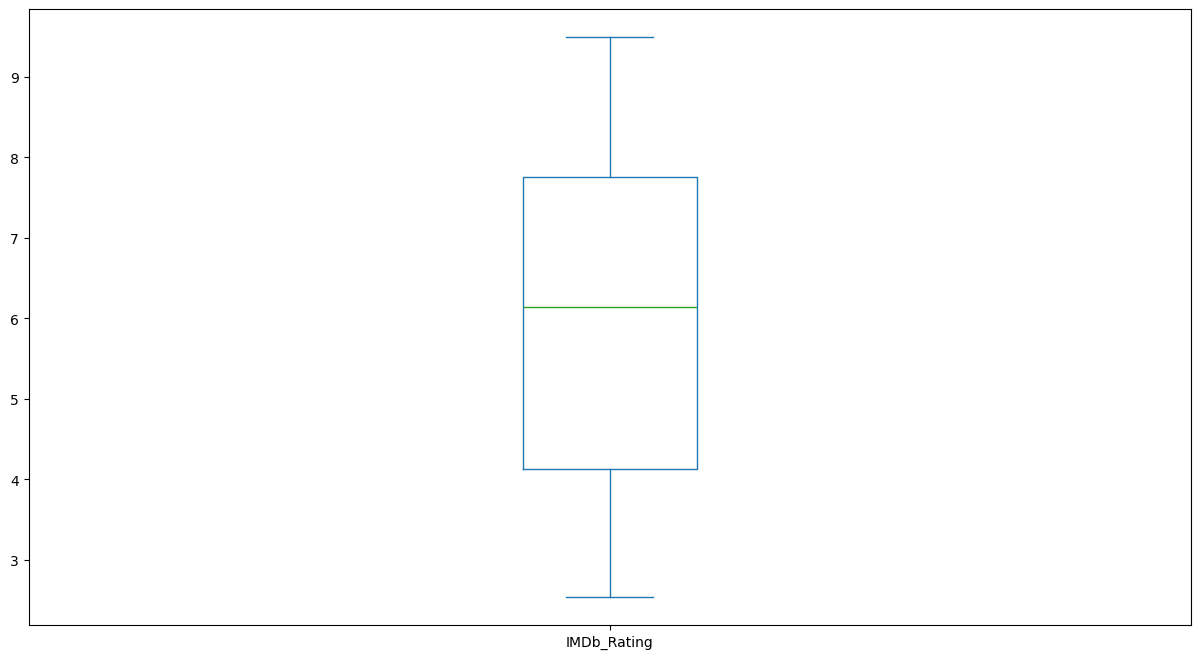

In [128]:
#What is the distribution of IMDb ratings? Are there any outliers
plt.figure(figsize=(15, 8))
df['IMDb_Rating'].plot(kind = "box")

In [129]:
#Are there any movies with extremely high or low budgets
min_and_max_budget = df.groupby('Title')['Budget_Million'].sum().reset_index()
min_and_max_budget.sort_values(by = 'Budget_Million', ascending = False)[:1]

,Title,Budget_Million
23,Movie 3,438.0


In [130]:
min_and_max_budget.sort_values(by = 'Budget_Million', ascending = False)[-1:]

,Title,Budget_Million
99,Movie 99,0.0


In [131]:
#How does the presence of missing values impact the dataset? Should we impute or remove them
cols_with_missing_values = ['Votes', 'Runtime_Minutes', 'IMDb_Rating', 'Box_Office_Million', 'Budget_Million']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean", missing_values = np.nan)
for i in cols_with_missing_values:
    df[[i]] = imputer.fit_transform(df[[i]])

In [132]:
#Is there a correlation between Rotten Tomatoes score and Audience score
df['Rotten_Tomatoes_Score'].corr(df['Audience_Score'])

-0.19517075806572937

In [133]:
#Do movies with higher budgets generally have higher IMDb ratings
movies_with_imdb_ratings = df.loc[:, ['Title', 'IMDb_Rating', 'Budget_Million']]
movies_with_imdb_ratings

,Title,IMDb_Rating,Budget_Million
0,Movie 1,3.014477,58.0
1,Movie 2,3.688305,51.0
2,Movie 3,6.138418,219.0
3,Movie 4,4.859022,181.0
4,Movie 5,8.302184,13.0
...,...,...,...
100,Movie 1,3.014477,58.0
101,Movie 2,3.688305,51.0
102,Movie 3,6.138418,219.0
103,Movie 4,4.859022,181.0


In [134]:
def transform(val):
    if val > 7 and val <= 10:
        return "Good"
    elif val > 4 and val <=7:
        return "Average"
    elif val > 0 and val <= 4:
        return "Poor"
    else:
        return "Undefined"
movies_with_imdb_ratings['Verdict'] = movies_with_imdb_ratings['IMDb_Rating'].apply(transform)
avg_rating = movies_with_imdb_ratings['Budget_Million'].mean()
movies_with_imdb_ratings[(movies_with_imdb_ratings['Budget_Million'] > avg_rating)].sort_values(by = "Budget_Million", ascending = False)[:5]

,Title,IMDb_Rating,Budget_Million,Verdict
83,Movie 84,4.789232,299.0,Average
52,Movie 53,5.606252,293.0,Average
41,Movie 42,5.921926,288.0,Average
61,Movie 62,8.582335,273.0,Good
16,Movie 17,8.139691,273.0,Good


Text(0.5, 1.0, 'the trend between movie runtime and audience score')

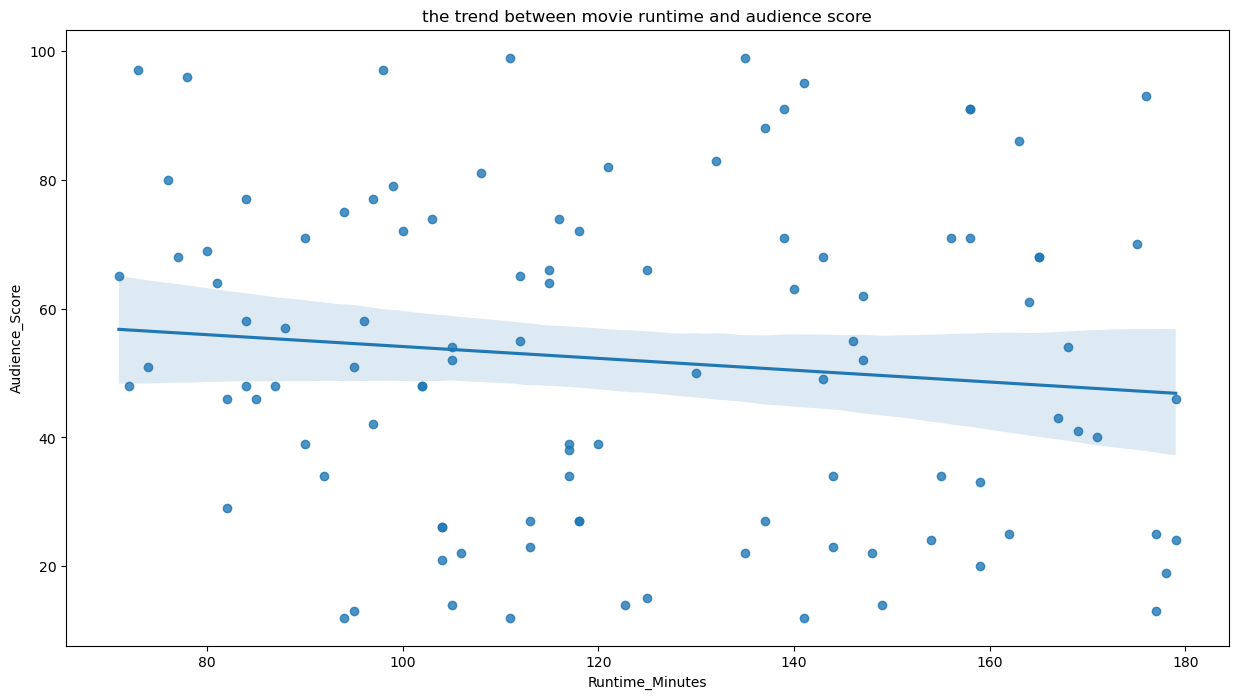

In [135]:
#What is the trend between movie runtime and audience score
plt.figure(figsize=(15, 8))
sns.regplot(x=df['Runtime_Minutes'], y=df['Audience_Score'])
plt.title("the trend between movie runtime and audience score")

In [136]:
#Do older movies have lower Rotten Tomatoes scores than newer ones
movie_with_lower_rotten_ratings = df.loc[:, ['Title', 'Release_Year', 'Rotten_Tomatoes_Score']]
def transform(val):
    if val > 2000:
        return "new"
    else:
        return "old"
movie_with_lower_rotten_ratings['Age_of_Movies'] = movie_with_lower_rotten_ratings['Release_Year'].apply(transform)
movie_with_lower_rotten_ratings.groupby("Age_of_Movies")['Rotten_Tomatoes_Score'].mean()

Age_of_Movies
new    53.810345
old    57.148936
Name: Rotten_Tomatoes_Score, dtype: float64

In [137]:
#Is there a significant difference in ratings between different movie languages
df.groupby("Language")["Audience_Score"].agg(["mean", "median", "std", "count"]).sort_values(by="mean", ascending=False)

,mean,median,std,count
Language,,,,
English,67.636364,69.0,19.709250,11
Korean,53.882353,52.0,18.704553,17
Spanish,52.625000,44.5,32.310713,8
Mandarin,51.200000,52.5,24.943492,10
Hindi,50.235294,58.0,26.515395,17
German,50.055556,48.0,23.725073,18
Japanese,47.615385,46.0,25.624007,13
French,45.000000,24.0,31.454729,11


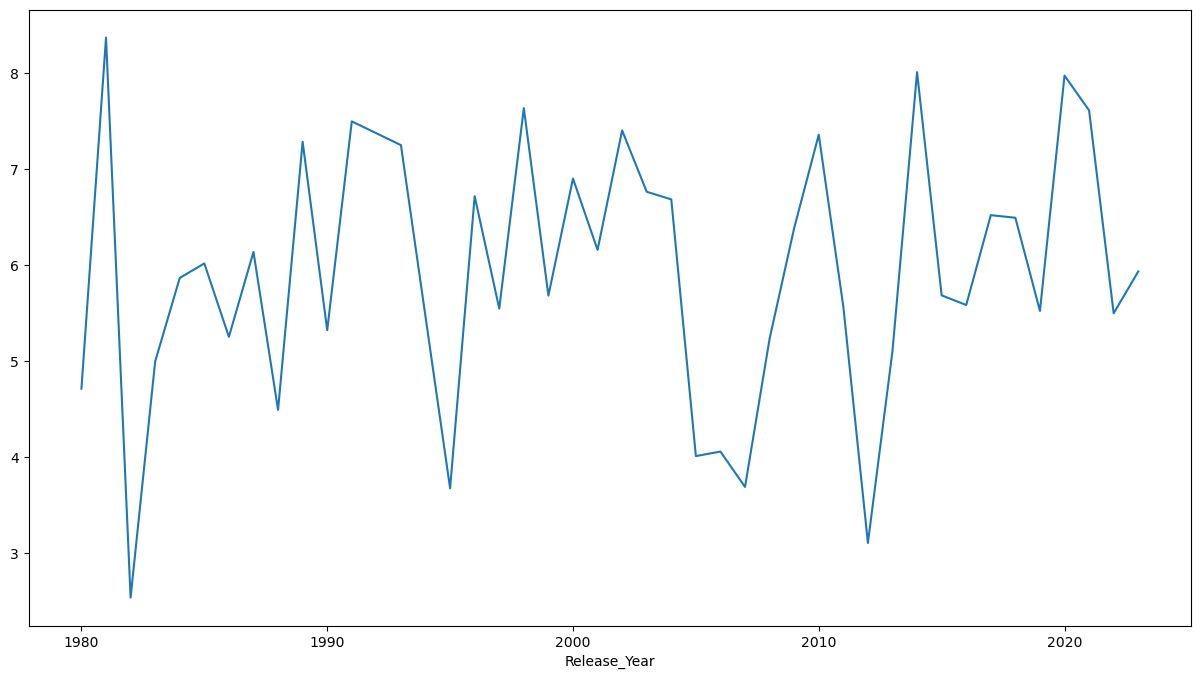

In [151]:
#How has the average IMDb rating changed over the years
avg_rating_years = df.groupby('Release_Year')['IMDb_Rating'].mean().reset_index()
#avg_rating_years.sort_values(by = "Release_Year", ascending = True)
plt.figure(figsize=(15, 8))
avg_rating_years = df.groupby('Release_Year')['IMDb_Rating'].mean().plot(kind = "line")

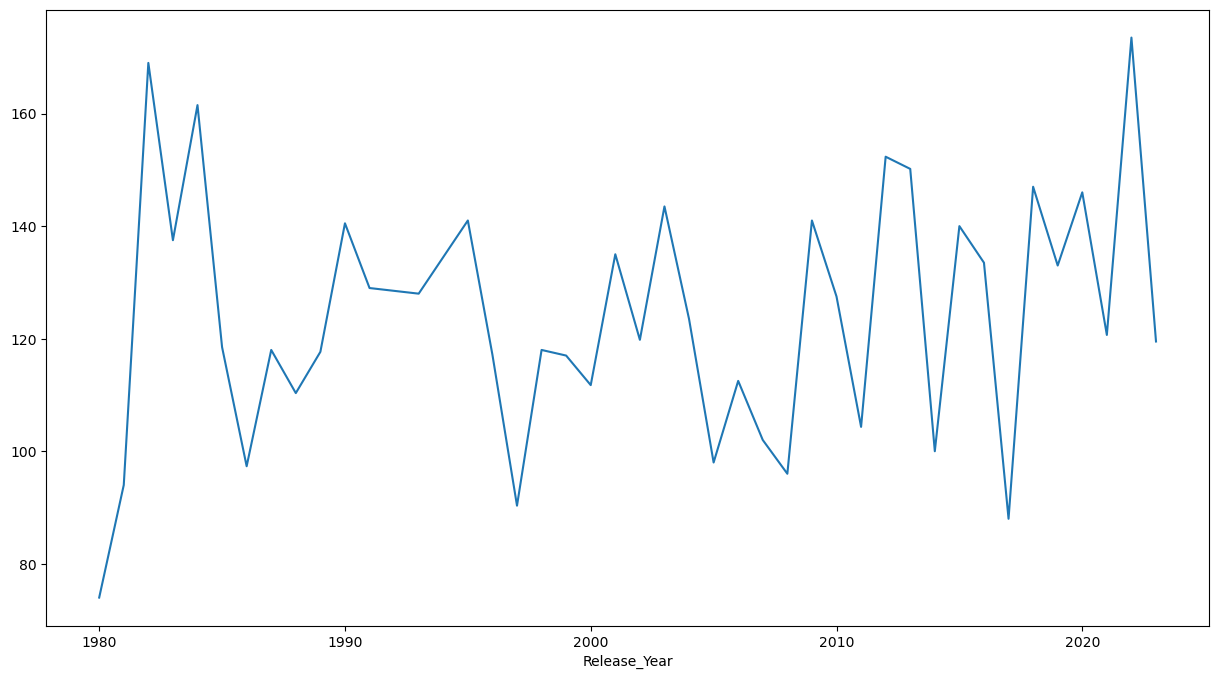

In [152]:
#Are movies becoming longer or shorter over time
movies_longer_or_shorter = df.groupby("Release_Year")['Runtime_Minutes'].mean().reset_index()
movies_longer_or_shorter.sort_values(by = "Release_Year",ascending= True)
plt.figure(figsize=(15, 8))
movies_longer_or_shorter = df.groupby("Release_Year")['Runtime_Minutes'].mean().plot(kind = "line")

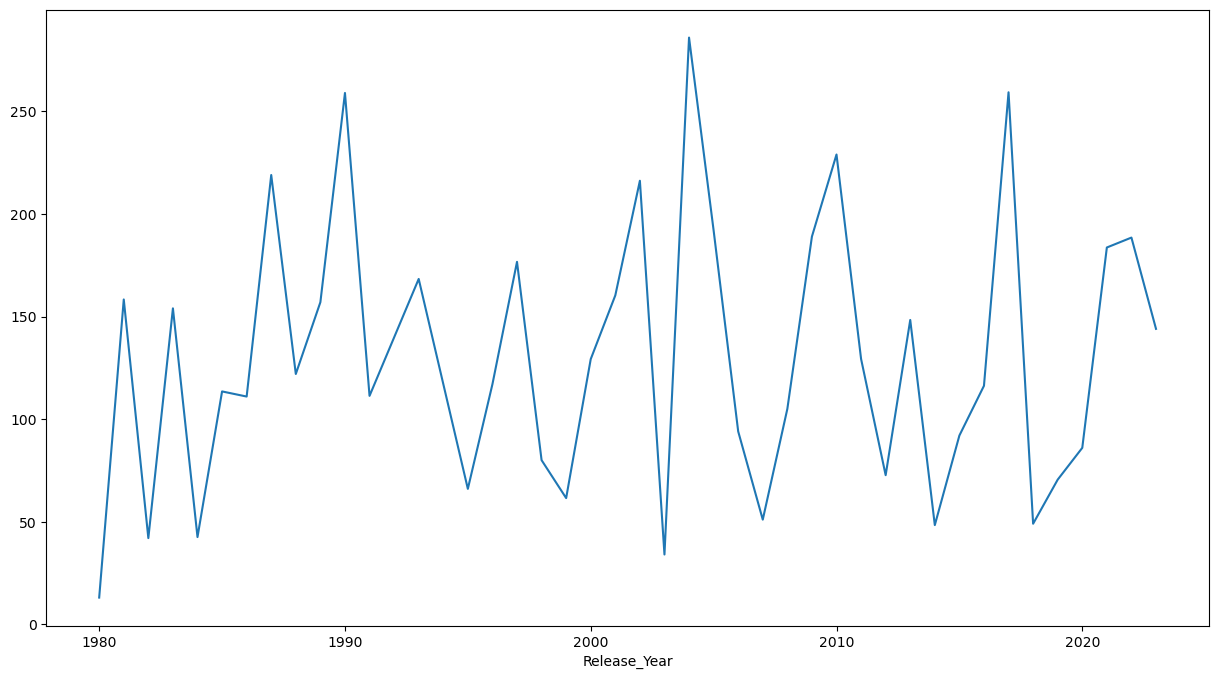

In [154]:
#Has the average budget for movies increased over the decades
movies_longer_or_shorter = df.groupby("Release_Year")['Budget_Million'].mean().reset_index()
movies_longer_or_shorter.sort_values(by = "Release_Year",ascending= True)
plt.figure(figsize=(15, 8))
movies_longer_or_shorter = df.groupby("Release_Year")['Budget_Million'].mean().plot(kind = "line")

In [161]:
#Which decade produced the highest number of highly-rated movies
highest_rated_movie_decade = df.loc[:, ['Release_Year', 'IMDb_Rating']]
def transform(val):
    if val in range(1980, 1991):
        return "1980s"
    elif val in range(1991, 2001):
        return "1990s"
    elif val in range(2001, 2011):
        return "2000s"
    elif val in range(2011, 2021):
        return "2010s"
    elif val in range(2021, 2026):
        return "2020s"
    else:
        return "1970s and below"
highest_rated_movie_decade['Decade'] = highest_rated_movie_decade['Release_Year'].apply(transform)
avg_highest_rated_movie_decade = highest_rated_movie_decade.groupby("Decade")['IMDb_Rating'].mean().reset_index()
avg_highest_rated_movie_decade.sort_values(by="IMDb_Rating", ascending = False)[:1]

,Decade,IMDb_Rating
1,1990s,6.626706
